In [1]:
import os
import sys
import time
import cv2
import numpy as np
import pandas as pd

In [48]:
# img = cv2.imread("./images/92745.jpg")
img = cv2.imread("./images/92755.jpg")
img = cv2.imread("./images/92757.jpg")
# img = cv2.resize(img, dsize=(600, 400))
img.shape

(500, 500, 3)

In [20]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
sift = cv2.xfeatures2d.SIFT_create()
keypoints, descriptor = sift.detectAndCompute(gray, None)
print(type(keypoints), len(keypoints), keypoints[0])
print(descriptor.shape)

<class 'list'> 3438 <KeyPoint 00000289EDDACE40>
(3438, 128)


In [24]:
# image 原始图像
# keypoints 特征点集合 list
# outImage 特征点绘制的画布图像
# color 颜色设置，默认是随机彩色
# flags 特征点绘制模式，设置特征点的哪些信息需要绘制，哪些不需要绘制
##      DRAW_MATCHES_FLAGS_DEFAULT  创建输出图像矩阵，使用现存的输出图像绘制匹配对和特征点，对每一个关键点只绘制中间点
##      DRAW_MATCHES_FLAGS_DRAW_OVER_OUTIMG  不创建输出图像矩阵，而是在输出图像上绘制匹配对
##      DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS  对每一个特征点绘制带大小和方向的关键点图形
##      DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS  单点的特征点不被绘制
img = cv2.drawKeypoints(image=img, keypoints=keypoints, 
                        outImage=img, color=(255, 100, 255),
                        flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

In [25]:
cv2.imshow('sift_keypoints', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [34]:
if not os.path.exists("./savedata"):
    os.mkdir("./savedata")
np.save("./savedata/descriptor.npy", descriptor)

In [35]:
des = np.load("./savedata/descriptor.npy")
des

array([[ 1.,  0.,  0., ...,  5.,  0.,  1.],
       [ 9.,  0.,  0., ...,  5.,  9.,  4.],
       [29.,  0.,  0., ..., 10.,  0.,  0.],
       ...,
       [29.,  1.,  0., ..., 28.,  4.,  1.],
       [ 3.,  0.,  0., ...,  2.,  4.,  3.],
       [13.,  0.,  0., ...,  6.,  0.,  0.]], dtype=float32)

In [43]:
read_dir = "./images/"

In [44]:
os.listdir(read_dir)

['.ipynb_checkpoints', '92745.jpg', '92755.jpg', '92757.jpg', 'zzz.jpg']

In [59]:
import glob
images = glob.glob(read_dir + "/*.[jp][pn]g")

if not os.path.exists("./descriptors"):
    os.mkdir("./descriptors")

for img_name in images:
    img = cv2.imread(img_name)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    sift = cv2.xfeatures2d.SIFT_create()
    _, descriptor = sift.detectAndCompute(gray, None)
    name = os.path.splitext(img_name)[0].split("\\")[1]
    np.save("./descriptors/{}.npy".format(name), descriptor)

In [69]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(des, descriptor, k=2)

In [75]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
# read images
img1 = cv2.imread('.\images\z1.jpg')
img2 = cv2.imread('.\images\z2.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
# sift
sift = cv2.xfeatures2d.SIFT_create()
keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)
len(keypoints_1), len(keypoints_2)

(3708, 3040)

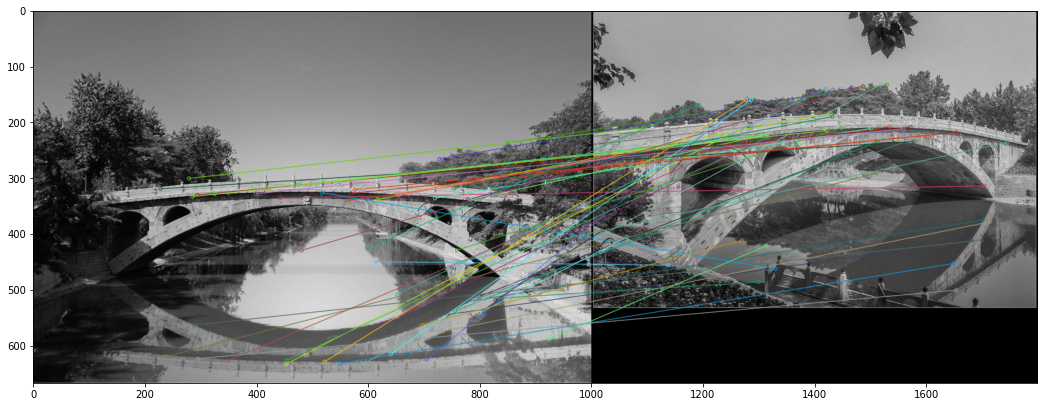

(<matplotlib.image.AxesImage at 0x289f52aa3c8>, None)

In [82]:
# feature matching
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(descriptors_1, descriptors_2)
matches =sorted(matches, key=lambda x:x.distance)
img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50], img2, flags=2)
plt.figure(figsize=[18,12])
plt.imshow(img3), plt.show()